<a href="https://colab.research.google.com/github/OmdenaAI/omdena-nigeria-energy/blob/main/Energy_availablity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
try:
  import geemap, ee
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    print("package not found, installing w/ pip in Google Colab...") ## for google collab
    !pip install geemap
  else:
    print("package not found, installing w/ conda...")
    !conda install mamba -c conda-forge -y   ## for your local directory
    !mamba install geemap -c conda-forge -y
    import geemap, ee

In [177]:
try:
  ee.Initialize()    ## This is done anytime you want to use the google earth engine API.
except Exception as e:
  ee.Authenticate()  ## To help google earth engine link your account
  ee.Initialize()

In [178]:
# you 1st need to right click on the shared folder and select 'Add to my Drive'
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [179]:
import pandas as pd
import ee
import geemap

#import geopandas as gpd
#import rasterio
#import gdal

In [180]:
# Accessing LGA level polygon boundaries of Nigeria using GIS extracted dataset 
#nig_lga = ee.FeatureCollection("users/ayanmiayan2010/LGA") \
#            .filter(ee.Filter.eq('LGA', 'Nigeria'))

In [181]:
# Accessing state level polygon boundaries of Nigeria using FAO dataset
nigeria = ee.FeatureCollection("FAO/GAUL/2015/level2") \
            .filter(ee.Filter.eq('ADM0_NAME', 'Nigeria'))

In [182]:
# Access the solar potential raster image downloaded as asset
pvpotential = ee.Image("users/ayanmiayan2010/PVOUT_NIG")

In [183]:
# Add reducer output to the Features in the collection.
pvpot = pvpotential.reduceRegions(
  collection = nigeria,
  reducer = ee.Reducer.mean(),
);

In [184]:
!pip install -q geopandas


In [185]:
import geopandas as gpd

In [186]:
#Converting the GEE Feature Collection into a pandas dataframe
pvPotdf = geemap.ee_to_geopandas(pvpot)
#pvPotdf = geemap.ee_to_pandas(pvpot)

In [187]:
pvPotdf

,geometry,ADM0_CODE,ADM0_NAME,ADM1_CODE,ADM1_NAME,ADM2_CODE,ADM2_NAME,DISP_AREA,EXP2_YEAR,STATUS,STR2_YEAR,Shape_Area,Shape_Leng,mean
0,"POLYGON ((4.75977 13.29626, 4.76085 13.28700, ...",182,Nigeria,65709,Sokoto,190949,Tangaza,NO,3000,Member State,1999,0.203399,1.915226,4.696233
1,"POLYGON ((12.81235 13.43154, 12.81462 13.42666...",182,Nigeria,2216,Borno,190950,Abadam,NO,3000,Member State,1999,0.204833,2.808507,4.751515
2,"POLYGON ((13.35680 13.57611, 13.36455 13.55711...",182,Nigeria,2216,Borno,190951,Lake chad,NO,3000,Member State,1999,0.439860,4.543677,4.702281
3,"POLYGON ((10.20444 13.06766, 10.20877 13.03678...",182,Nigeria,2240,Yobe,190952,Yusufari,NO,3000,Member State,1999,0.356411,3.409977,4.771416
4,"POLYGON ((7.85296 13.10031, 7.85343 13.09930, ...",182,Nigeria,2226,Katsina,190953,Mashi,NO,3000,Member State,1999,0.075656,1.289336,4.803762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,"POLYGON ((5.95349 13.25772, 5.95652 13.24321, ...",182,Nigeria,65709,Sokoto,191408,Isa,NO,3000,Member State,1000,0.173053,2.308026,4.697784
771,"POLYGON ((3.47113 11.44857, 3.50235 11.40327, ...",182,Nigeria,2227,Kebbi,22886,Bagudo,NO,3000,Member State,1000,0.403523,2.967221,4.434699
772,"POLYGON ((6.39559 12.72981, 6.39789 12.71916, ...",182,Nigeria,65710,Zamfara,23103,Zurmi,NO,3000,Member State,1000,0.230798,2.567153,4.707865
773,"POLYGON ((3.58417 10.27837, 3.58462 10.27514, ...",182,Nigeria,2231,Niger,22940,Borgu,NO,3000,Member State,1000,0.851470,5.288074,4.319234


In [188]:
# Sort the dataframe by PV potential 
statedf=pvPotdf[['ADM1_NAME','geometry','mean']]
statedf.groupby('ADM1_NAME')['mean'].agg('sum')

ADM1_NAME
Abia            61.166653
Abuja           24.411801
Adamawa         95.929049
Akwa Ibom      107.870765
Anambra         78.157806
Bauchi          93.574852
Bayelsa         27.909460
Benue           91.319498
Borno          130.908232
Cross River     66.968723
Delta           90.435214
Ebonyi          49.074929
Edo             67.070429
Ekiti           62.337515
Enugu           64.180742
Gombe           50.553871
Imo             98.552775
Jigawa         127.500979
Kaduna         103.649820
Kano           206.764508
Katsina        161.487301
Kebbi           94.619660
Kogi            82.737608
Kwara           64.360461
Lagos           73.339718
Nassarawa       53.559736
Niger          104.757290
Ogun            72.574815
Ondo            67.372749
Osun           112.166487
Oyo            124.374061
Plateau         76.738008
Rivers          80.061990
Sokoto         106.895103
Taraba          68.882599
Yobe            80.353567
Zamfara         64.884521
Name: mean, dtype: float64

In [191]:
statedf

,ADM1_NAME,geometry,mean
0,Sokoto,"POLYGON ((4.75977 13.29626, 4.76085 13.28700, ...",4.696233
1,Borno,"POLYGON ((12.81235 13.43154, 12.81462 13.42666...",4.751515
2,Borno,"POLYGON ((13.35680 13.57611, 13.36455 13.55711...",4.702281
3,Yobe,"POLYGON ((10.20444 13.06766, 10.20877 13.03678...",4.771416
4,Katsina,"POLYGON ((7.85296 13.10031, 7.85343 13.09930, ...",4.803762
...,...,...,...
770,Sokoto,"POLYGON ((5.95349 13.25772, 5.95652 13.24321, ...",4.697784
771,Kebbi,"POLYGON ((3.47113 11.44857, 3.50235 11.40327, ...",4.434699
772,Zamfara,"POLYGON ((6.39559 12.72981, 6.39789 12.71916, ...",4.707865
773,Niger,"POLYGON ((3.58417 10.27837, 3.58462 10.27514, ...",4.319234


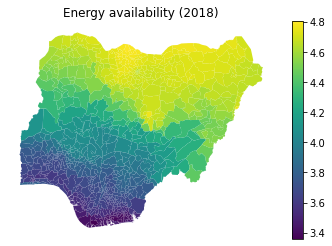

In [192]:
# high demand areas is in blue

ax=statedf.plot(column='mean',legend=True)
ax.set_title('Energy availability (2018)')
ax.set_axis_off()